# Logistic Regression
We will use the Penguin dataset from seaborn. The primary objective of this notebook is to build a logistic regression model to predict whether a penguin is of a 'Adelie', 'Chinstrap', or 'Gentoo' penguin species based on features like bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g. This involves loading and preprocessing the data, exploratory data analysis, feature encoding, data normalization, model training and evaluation, and making predictions.

## Imports and loading the dataset

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#sci-kit learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the penguin dataset
df = sns.load_dataset("penguins")

df.info() #There are some NANs
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
# Display unique values in 'species' column to understand its distribution
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [3]:
#Check NANs in the dataset
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
#There is 11 NANs in the 'sex' column. We can drop all the NANs.
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

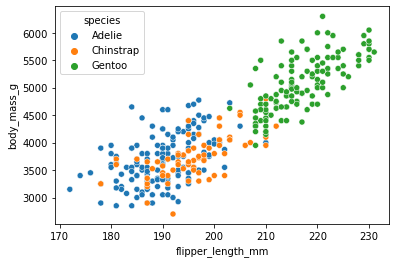

In [5]:
sns.scatterplot(data=df,x='flipper_length_mm',y='body_mass_g',hue='species')

**From above**: It looks like 'Gentoo' penguins have higher body_mass and larger flipper lengths compared to the others.

**From below"**: It looks like 'Adelie' and 'Chinstrap' penguins have lower body_mass and lower flipper lengths compared 'Gentoo'. But 'Adelie' penguins have smaller bill_length compared to 'Chinstrap'.

<AxesSubplot:xlabel='bill_length_mm', ylabel='body_mass_g'>

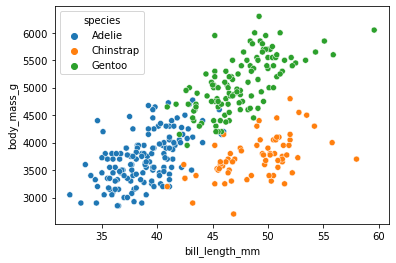

In [6]:
sns.scatterplot(data=df,x='bill_length_mm',y='body_mass_g',hue='species')

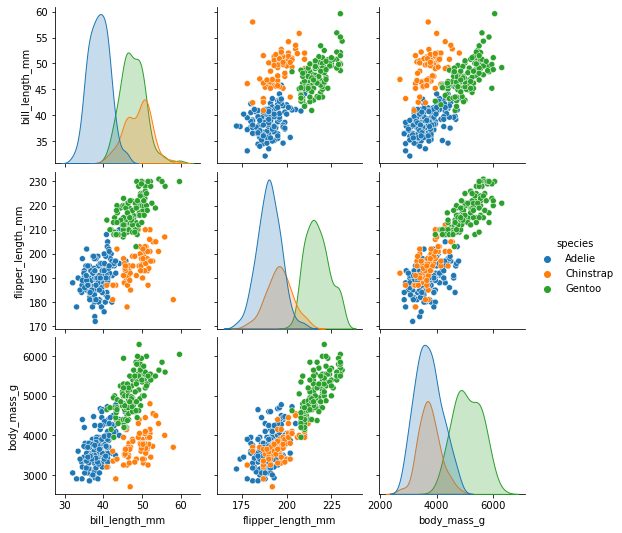

In [7]:
sns.pairplot(df[['bill_length_mm','flipper_length_mm','species','body_mass_g']],hue='species')

## Data Preprocessing

In [8]:
#Checking the columns with categorical values.
object_columns = df.columns[df.dtypes == 'object']
object_columns

Index(['species', 'island', 'sex'], dtype='object')

Converting categorical columns to numerical ones and storing the mapping for future use

In [9]:
# Encode categorical columns
'''
We want to store the original categorical values i.e. 'Adelie', 'Chinstrap', and 'Gentoo',
and their corresponding encoded numerical values in a dictionary, e.g. {0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}

Useful during predictions, we can say that given a certain bill_length, flipper_length and body_mass, 
the penguin is an 'Adelie' instead of '0', or a 'Chinstrap' instead of '1'. 

Below, we store all the categorical columns and their corresponding numerical values as key value pairs in a dictionary.
'''

dict_all = dict(zip([], []))
for column in object_columns:
    temp_keys = df[column].values #Original categories
    temp_values = LabelEncoder().fit_transform(df[column]) #Encoded numerical values
    dict_temp = dict(zip(temp_values,temp_keys)) #Storing in a dictionary
    dict_all[column] = dict_temp
    df[column] = LabelEncoder().fit_transform(df[column]) #Applying encoding to the original dataframe
        
dict_all

{'species': {0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'},
 'island': {2: 'Torgersen', 0: 'Biscoe', 1: 'Dream'},
 'sex': {1: 'Male', 0: 'Female'}}

In [10]:
print("Mapping of Categories",dict_all)

Mapping of Categories {'species': {0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}, 'island': {2: 'Torgersen', 0: 'Biscoe', 1: 'Dream'}, 'sex': {1: 'Male', 0: 'Female'}}


In [11]:
"""
Check that the categorical columns have been encoded to numerical ones. 
Please note that the original dataframe 'df' has been encoded to one with 
only numeric columns (all dtypes are int or float). 
"""
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int32  
 1   island             333 non-null    int32  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int32  
dtypes: float64(4), int32(3)
memory usage: 16.9 KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


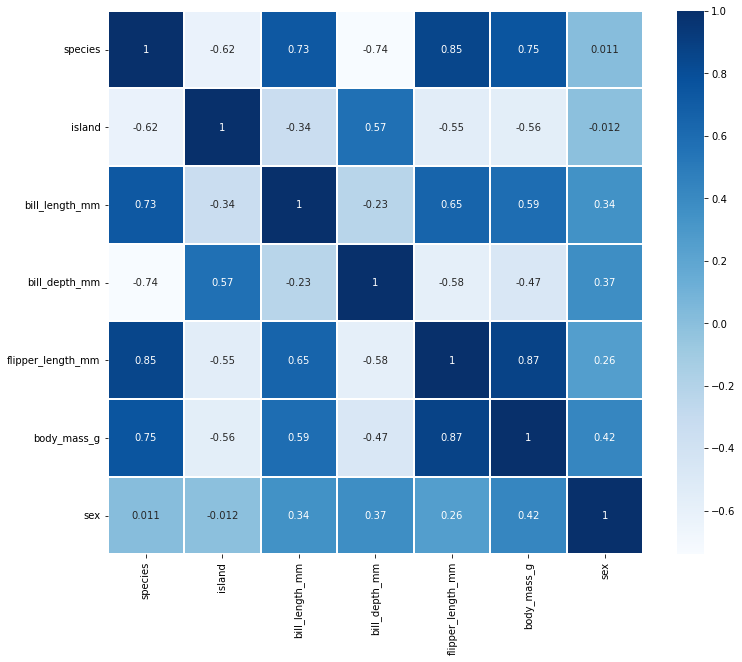

In [12]:
# Plot the heatmap to visualize feature correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=2)
plt.show()

<AxesSubplot:>

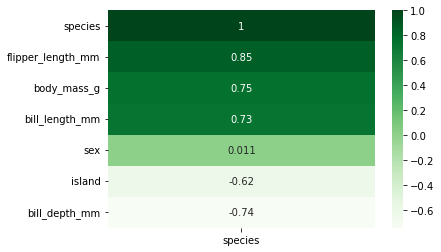

In [13]:
corr = df.corr()[['species']].sort_values(by='species', ascending=False)
sns.heatmap(corr, annot=True, cmap='Greens')

Since we want to predict the 'species' we find the columns which are highly correlated with that column from the heatmap. 

The heatmap above shows that 'flipper_length_mm', 'body_mass_g', and 'bill_length_mm' have the highest positive correlation with 'species'. We will take these three as the 'features' (X) and 'species' as the 'target' (y).

In [14]:
# Splitting the dataset into features and target
X = df[['flipper_length_mm', 'body_mass_g', 'bill_length_mm']] #df.drop('species', axis=1)
y = df['species']

## Train Test Split

In [15]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X.head(),y.head()

(   flipper_length_mm  body_mass_g  bill_length_mm
 0              181.0       3750.0            39.1
 1              186.0       3800.0            39.5
 2              195.0       3250.0            40.3
 4              193.0       3450.0            36.7
 5              190.0       3650.0            39.3,
 0    0
 1    0
 2    0
 4    0
 5    0
 Name: species, dtype: int32)

## Implementing Logistic Regression model

In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic regression model
log_reg = LogisticRegression()

#Fit the logistic regression model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

Predictions

In [18]:
# Predict the model
y_pred = log_reg.predict(X_test_scaled)
y_pred

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2,
       0])

Model Performance Evaluation

In [19]:
#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report     , ConfusionMatrixDisplay

print("Accuracy Score:",accuracy_score(y_pred, y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred, y_test))
print("Classification Report: \n " ,classification_report(y_pred, y_test))

Accuracy Score: 0.9850746268656716
Confusion Matrix: 
 [[31  0  1]
 [ 0 13  0]
 [ 0  0 22]]
Classification Report: 
                precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      1.00      1.00        13
           2       0.96      1.00      0.98        22

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



Accuracy

In [20]:
accuracy_Score_logistic = accuracy_score(y_test, y_pred)
print('LogisticRegression model accuracy is: {:.2f}%'.format(accuracy_Score_logistic*100))

LogisticRegression model accuracy is: 98.51%


Confusion Matrix and Classification report

[[31  0  1]
 [ 0 13  0]
 [ 0  0 22]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      1.00      1.00        13
           2       0.96      1.00      0.98        22

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



<Figure size 3600x1080 with 0 Axes>

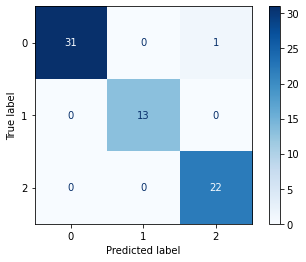

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test,labels=log_reg.classes_)
# sns.heatmap can also be used to get the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
plt.figure(figsize=(50, 15))
disp.plot(cmap='Blues')


Recap of what 0,1,2 stands for in terms of the original categories.

In [22]:
dict_all['species']

{0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}

## Making Predictions

Finally, the trained model is used to make predictions on new data. This step demonstrates how the model can be applied to predict the 'species' of a penguini based on their features (flipper_length_mm, body_mass_g, bill_length_mm).

In [23]:
# predict only on a single row, provide X in order of [flipper_length_mm, body_mass_g, bill_length_mm]
print('Flipper length (mm) ranges between: ', min(X['flipper_length_mm']),max(X['flipper_length_mm']))
print('Body mass (grams) ranges in between: ', min(X['body_mass_g']),max(X['body_mass_g']))
print('Bill length (mm) ranges between ', min(X['bill_length_mm']),max(X['bill_length_mm']))

Flipper length (mm) ranges between:  172.0 231.0
Body mass (grams) ranges in between:  2700.0 6300.0
Bill length (mm) ranges between  32.1 59.6


In [24]:
#Choose an array for flipper_length_mm, body_mass_g, bill_length_mm or test with any of the 3 options below
#arr = [213,5400,50] #Gentoo
arr = [170, 3000,55] #Chinstrap
#arr = [180,3700,39] #Adelie 

species_cat = int(np.asarray(log_reg.predict(scaler.transform([arr]))))
print(f'It is a ' + dict_all['species'].get(species_cat) + ' penguin!')

It is a Chinstrap penguin!


C:\Users\moumi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
